# Section A

## 1.  Research Question
The dataset consists of AnyTelecom Company's observations on customer demographics and customer churn. As the project's data analyst, my task is to perform exploratory data analysis (EDA) on the dataset and answer the following research question: Is there a relationship between the seconds of outages reported by the customer per week and the area type they reside in (urban, suburban, or rural)?

Null Hypothesis: Area type does not affect outages reported per week.

Alternate Hypothesis: Area type does affect outages reported per week.

Method: Analysis of variance (ANOVA) statistical test.

Confidence Interval: 95%

## 2.  Business Relevance
As the strategic decision-makers of AnyTelecom Company, the Board of Directors hold a vital stake in the organization. By utilizing the results of the analysis, the Board can identify disparities in service quality across different area types, analyze the cause of such inconsistencies, and create a plan to enhance service quality in any deficient areas.

Customer service and technical support, as customer-facing stakeholders within AnyTelecom Company, play a vital role in providing quality service to customers. In case the analysis reveals any inconsistencies in service quality among different area types, AnyTelecom Company can utilize the opportunity to rectify those inconsistencies and reduce the number of customer service and technical support contacts related to service outages.

## 3.  Relevant Data
The data to be used in the ANOVA statistical test is summarized in the table below:

- Variable Name	Data Type	Description	Example
- Area	Qualitative	area type	Urban
- Outage_sec_perweek	Quantitative	system outages seconds per week	6.972566093

# Section B

## 1.  Statistical Testing

In [26]:
# read churn_clean dataset into pandas DataFrame
# import pandas for analysis and data manipulation

# Title: panda-dev/pandas
# Author: The pandas development team
# Date: 2023
# Code Version: latest
# Availability: https://doi.org/10.5281/zenodo.7741580

import pandas as pd

df = pd.read_csv('source files/churn_clean.csv')


# isolate features relevant to research question
df = df.loc[:, ['Area', 'Outage_sec_perweek', 'MonthlyCharge', 'Churn']]
df.head(5)

,Area,Outage_sec_perweek,MonthlyCharge,Churn
0,Urban,7.978323,172.455519,No
1,Urban,11.699080,242.632554,Yes
2,Urban,10.752800,159.947583,No
3,Suburban,14.913540,119.956840,No
4,Suburban,8.147417,149.948316,Yes


In [27]:
# import scipy.stats to perform the ANOVA test

# Title: scipy/scipy: Scipy
# Author: Gommers, et al.
# Date: 2023
# Code Version: latest

import scipy.stats as stats

In [28]:
# extract groups from df (by Area type)

# Title: Python for Data 26: ANOVA
# Author: Greg Hamel
# Date: 2021
# Code Version: latest
# Availability: https://www.kaggle.com/code/hamelg/python-for-data-26-anova

urban = df[df['Area'] == 'Urban'][['Outage_sec_perweek']]
suburban = df[df['Area'] == 'Suburban'][['Outage_sec_perweek']]
rural = df[df['Area'] == 'Rural'][['Outage_sec_perweek']]

# perform the ANOVA test
stats.f_oneway(urban, suburban, rural)

F_onewayResult(statistic=array([0.20068073]), pvalue=array([0.8181769]))

## 2.  Output
- F-statistic=0.20068073
- p-value=0.8181769

## 3.  Justification
ANOVA is a statistical procedure that tests for a statistically significant difference among multiple groups (Bruce, Bruce, & Gedeck, 2019). Recall that Area type serves as the independent variable in the research question (refer to Section A1. Research Question). Given that Area contains multiple groups or types (Urban, Suburban, and Rural), ANOVA is the appropriate technique for testing the null hypothesis associated with the research question.

# Section C

## Visualization of Univariate Statistics

In [29]:
# import seaborn and matplotlib for visualizations
import seaborn as sns

# Title: seaborn: statistical data visualization
# Author: Michael Waskom
# Date: 2021
# Code Version: latest
# Availability: https://doi.org/10.5281/zenodo.4645478

import matplotlib.pyplot as plt

# Title: matplotlib/matplotlib
# Author: Caswell, et al.
# Date: 2023
# Code Version: latest
# Availability: https://doi.org/10.5281/zenodo.7697899

### Area

In [48]:
# Count number of records by Area type
data = df['Area'].value_counts()
data

Suburban    3346
Urban       3327
Rural       3327
Name: Area, dtype: int64

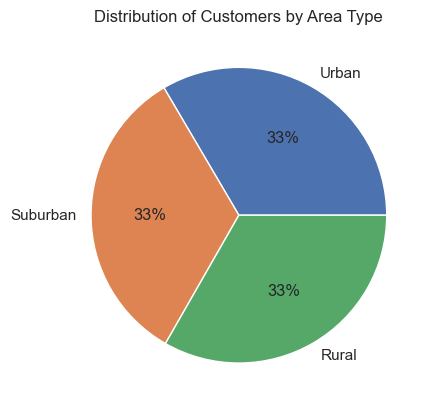

In [49]:
# Draw a piechart of Area
sns.set_style("whitegrid")
plt.pie(data, labels=['Urban', 'Suburban', 'Rural'], autopct='%.0f%%')
plt.title('Distribution of Customers by Area Type')
plt.show()

### Churn

In [50]:
# Count number of records by customer Churn
data = df['Churn'].value_counts()
data

No     7350
Yes    2650
Name: Churn, dtype: int64

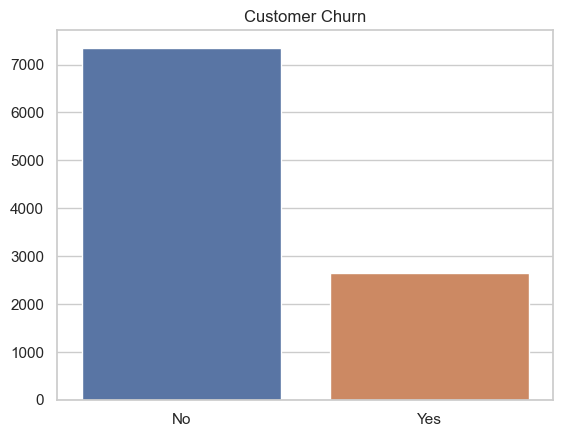

In [52]:
# Draw a barplot of Churn
sns.barplot(x=data.index, y=data.values)
plt.title('Customer Churn')
plt.show()

### Outage_sec_perweek

In [53]:
# get statistics on Outage_sec_perweek
df['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

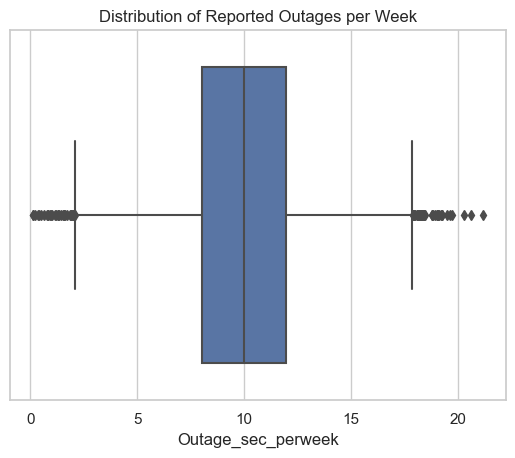

In [55]:
# Draw a boxplot of Outage_sec_perweek
sns.boxplot(x='Outage_sec_perweek', data=df)
plt.title('Distribution of Reported Outages per Week')
plt.show()

### MonthlyCharge

In [56]:
# get statistics on MonthlyCharge
df['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

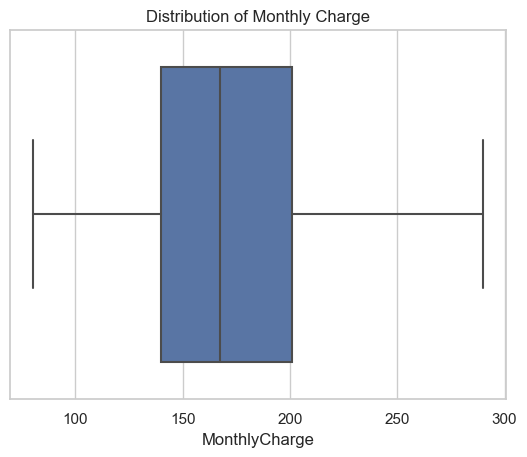

In [57]:
# Draw a boxplot of MonthlyCharge
sns.boxplot(x='MonthlyCharge', data=df)
plt.title('Distribution of Monthly Charge')
plt.show()

# Section D

## Visualization of Bivariate Statistics

### Area and Churn

In [58]:
# Count number of records by customer Churn, then Area (multilevel index)
data = df[['Area', 'Churn']].value_counts()
data

Area      Churn
Suburban  No       2473
Rural     No       2464
Urban     No       2413
          Yes       914
Suburban  Yes       873
Rural     Yes       863
dtype: int64

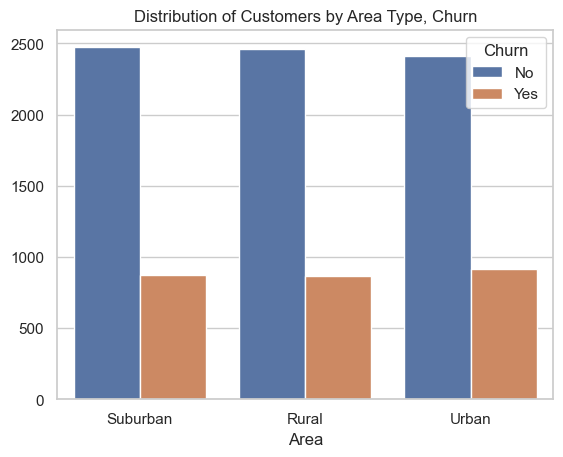

In [59]:
# Draw a barplot of Area and Churn
sns.barplot(x=data.index.get_level_values(0), y=data.values, hue=data.index.get_level_values(1))
plt.title('Distribution of Customers by Area Type, Churn')
plt.show()

### Area and Outage_sec_perweek

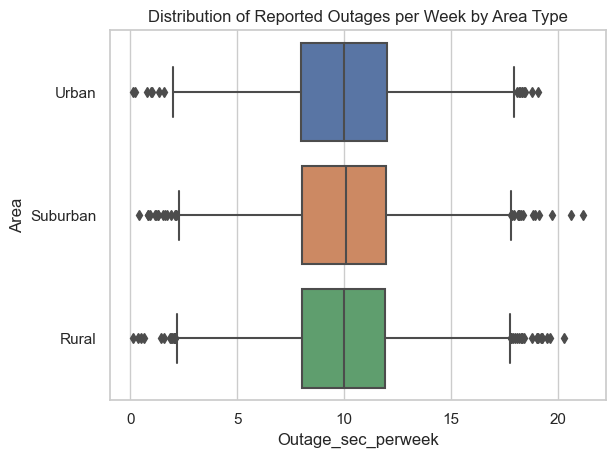

In [60]:
# Draw a boxplot of Outage_sec_perweek by Area
sns.boxplot(x='Outage_sec_perweek', y='Area', data=df)
plt.title('Distribution of Reported Outages per Week by Area Type')
plt.show()

### Area and MonthlyCharge

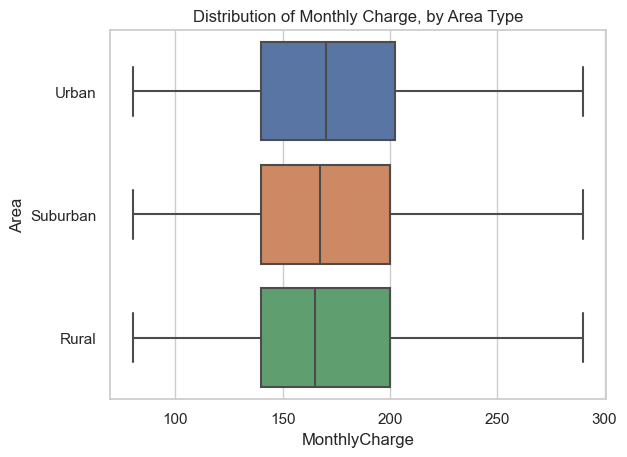

In [61]:
# Draw a boxplot of MonthlyCharge by Area
sns.boxplot(x='MonthlyCharge', y='Area', data=df)
plt.title('Distribution of Monthly Charge, by Area Type')
plt.show()

### Outage_sec_perweek, MonthlyCharge, and Churn

In [62]:
# get correlation of Outage_sec_perweek and MonthlyCharge
df[['Outage_sec_perweek']].corrwith(df['MonthlyCharge'])

Outage_sec_perweek    0.020496
dtype: float64

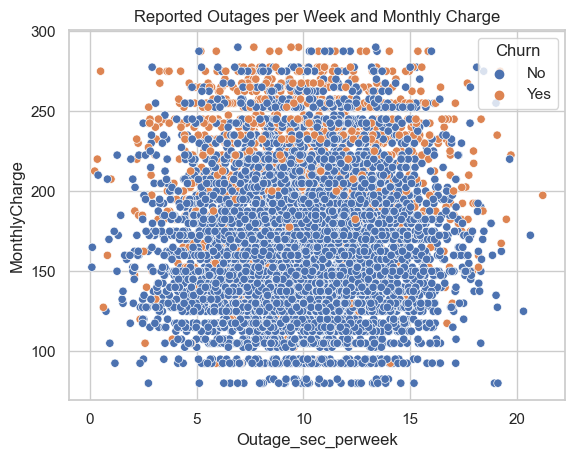

In [63]:
# Draw a scatterplot of Outage_sec_perweek against MonthlyCharge, grouped by customer Churn
sns.scatterplot(data=df, x='Outage_sec_perweek', y='MonthlyCharge', hue='Churn')
plt.title('Reported Outages per Week and Monthly Charge')
plt.show()

### MonthlyCharge and Churn

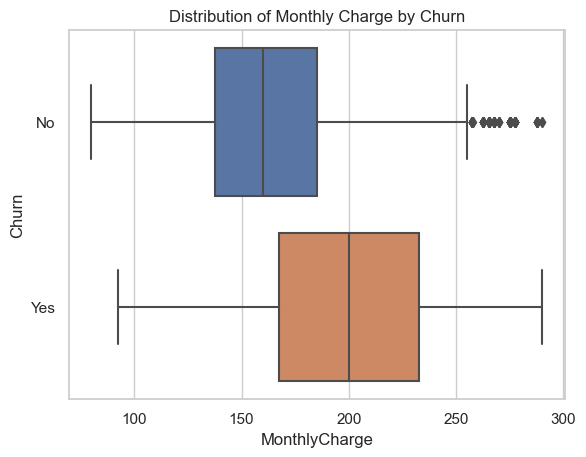

In [64]:
# Draw a boxplot of MonthlyCharge by customer Churn
sns.boxplot(x='MonthlyCharge', y='Churn', data=df)
plt.title('Distribution of Monthly Charge by Churn')
plt.show()

# Section E

## 1. Results
According to Bruce, Bruce, and Gedeck, the p-value is the probability of obtaining results as unusual or extreme as the observed result (2019). Recall that the p-value obtained from the ANOVA statistical test was 0.8181769 (refer to Sections B1. Statistical Testing and B2. Output). In effect, the variance observed among the Area types can be explained by random chance over 80% of the time. This falls significantly short of the 95% confidence interval selected in Section A1. Research Question as the p-value would need to be less than 0.05 to fall within the specified confidence interval.

The results of of the ANOVA statistical test lead us to accept the null hypothesis, i.e., that area type does not affect the outages reported per week.

## 2. Limitations
Outliers were identified for the variable Outage_sec_perweek (refer to Figure ##), but were retained since there was no indication of erroneous or illegitimate entry. The limitation associated with retaining outliers is that they can distort statistical models (Larose & Larose, 2019). It is possible that the outliers included in the Outage_sec_perweek feature impacted the ANOVA statistical test and produced faulty results for the F-statistic and p-value.

## 3. Next Steps
Based on the results of the analysis, I do not recommend further investigation into the relationship between area type and reported outages per week. Upon conducting EDA and producing visualizations for additional features in the dataset, it appears that a relationship exists between the variables MonthlyCharge and Churn (refer to Figures ## and ## for more information). Based on the results of the EDA, I recommend forming a new hypothesis and performing a t-Test to better understand the potential impact that MonthlyCharge has on customer Churn.

# Section F

## Panopto Recording
To view a walkthrough demonstration of the programming environment and code execution, visit the following Panopto link: ...

# Section G
## Web Sources

# Section H
## References